# Проектная работа по модулю “Математика и статистика в Python”


### 1. Загрузить файл hr.csv

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import pylab 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('HR.csv')

In [5]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

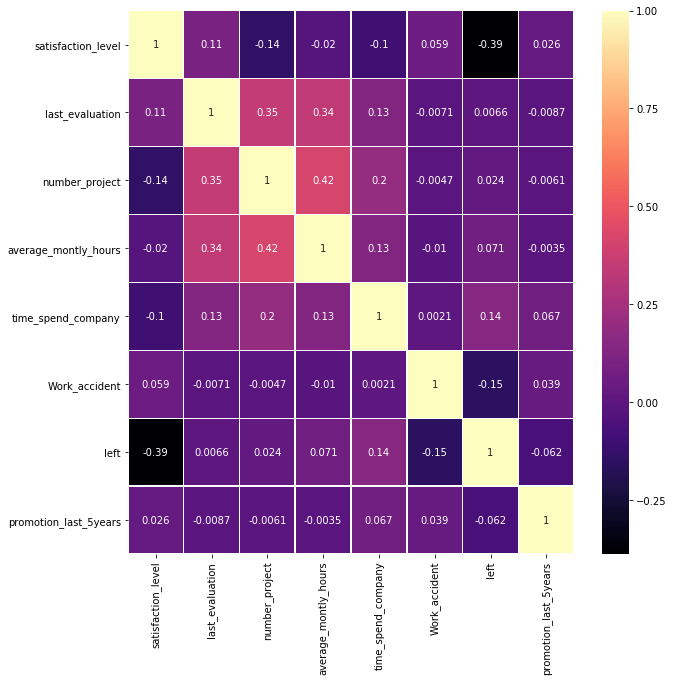

None


In [15]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='magma')
print (plt.show())

### 4. Визуализировать несколько взаимосвязей между переменными

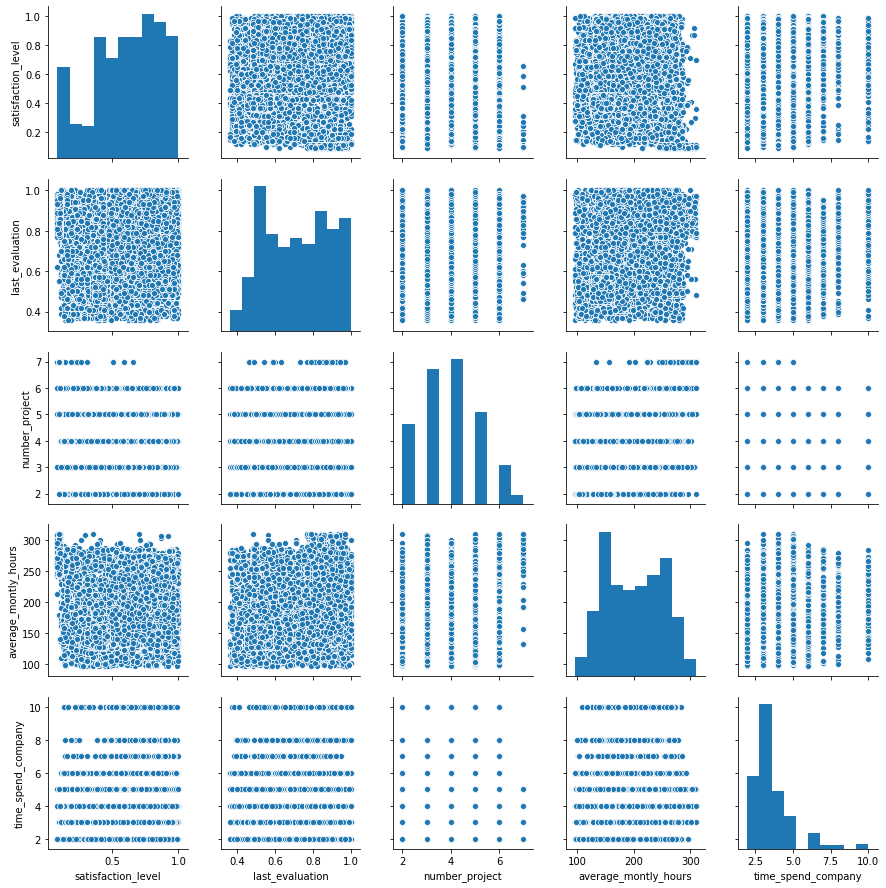

None


In [14]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
print (plt.show())

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#### Гипотеза о влиянии зарплаты на количество проведенных часов на работе. 

In [12]:
stats.ttest_ind(
    df[df['salary'] == 'high']['average_montly_hours'].dropna(),
    df[df['salary'] == 'low']['average_montly_hours'].dropna()
)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

### pvalue > 0,05, следовательно гипотеза ВЕРНА! Количество проведенных часов на работе ВЛИЯЕТ на заработную плату

### 6. Рассчитать сколько работников работает в каждом департаменте

In [20]:
res = df.groupby('sales').size().reset_index(name='Amount_of_workers')
print (res)

         sales  Amount_of_workers
0           IT               1227
1        RandD                787
2   accounting                767
3           hr                739
4   management                630
5    marketing                858
6  product_mng                902
7        sales               4140
8      support               2229
9    technical               2720


### 7. Показать распределение сотрудников по зарплатам

In [23]:
res = df.groupby('salary').size().reset_index(name='counts')
print (res)

   salary  counts
0    high    1237
1     low    7316
2  medium    6446


### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [24]:
res = df.groupby(['salary', 'sales']).size().reset_index(name='counts').sort_values(['sales', 'salary'])
print(res)

    salary        sales  counts
0     high           IT      83
10     low           IT     609
20  medium           IT     535
1     high        RandD      51
11     low        RandD     364
21  medium        RandD     372
2     high   accounting      74
12     low   accounting     358
22  medium   accounting     335
3     high           hr      45
13     low           hr     335
23  medium           hr     359
4     high   management     225
14     low   management     180
24  medium   management     225
5     high    marketing      80
15     low    marketing     402
25  medium    marketing     376
6     high  product_mng      68
16     low  product_mng     451
26  medium  product_mng     383
7     high        sales     269
17     low        sales    2099
27  medium        sales    1772
8     high      support     141
18     low      support    1146
28  medium      support     942
9     high    technical     201
19     low    technical    1372
29  medium    technical    1147


### 9. Сколько сотрудников покинули компанию

In [25]:
res = df['left'].sum()
print(f'Компанию покинул {res} сотрудник')

Компанию покинул 3571 сотрудник


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [40]:
employees_left = df[ df['left'] == 1]

In [54]:
# 1
ttest = stats.ttest_1samp(employees_left['satisfaction_level'], 0.80)
print(ttest)

Ttest_1sampResult(statistic=-81.48633011926212, pvalue=0.0)


In [53]:
# 2
ttest = stats.ttest_1samp(employees_left['average_montly_hours'], 262)
print(ttest)

Ttest_1sampResult(statistic=-53.292153277023615, pvalue=0.0)


In [49]:
# 3
ttest = stats.ttest_1samp(employees_left['Work_accident'], 0)
print(ttest)

Ttest_1sampResult(statistic=13.317119771645281, pvalue=1.5902764568770212e-39)


In [52]:
# 4
ttest = stats.ttest_1samp(employees_left['promotion_last_5years'], 0)
print(ttest)

Ttest_1sampResult(statistic=4.3699294941433315, pvalue=1.2782413747196752e-05)


#### Общие выводы о предполагаемых гипотезах. 

1. satisfaction_level (уровень удовлетворенности) pvalue=0.0 - гипотеза не принимается, поскольку данный фактор не мог повлиять на улольнение сотрудников.

2. average_montly_hours (среднемесячные часы) pvalue=0.0 - гипотеза не принимается, поскольку данный фактор не мог повлиять на улольнение сотрудников.

3. Work_accident (несчастные случаи на работе) pvalue=1.59 - гипотеза принимается, поскольку данный фактор мог повлиять на улольнение сотрудников.

4. promotion_last_5years (продвижение последние пять лет) pvalue=1.27 - - гипотеза принимается, поскольку данный фактор мог повлиять на улольнение сотрудников.

### 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте